### Original unit is: m (of water equivalent per hour)
https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview

https://confluence.ecmwf.int/pages/viewpage.action?pageId=197702790

The ECMWF Integrated Forecasting System convention is that downward fluxes are positive. Therefore, negative values indicate evaporation and positive values indicate condensation.(https://codes.ecmwf.int/grib/param-db/?id=182)

In [2]:
# 必要依赖：https://github.com/ecmwf/cfgrib
# conda install -c conda-forge eccodes
# conda install -c conda-forge cfgrib
import xarray
from datetime import datetime, timedelta
import numpy
import matplotlib.pyplot as plt

In [3]:
# Total ET 0.1° x 0.1°
era5_et_grib = '/disk2/Data/ERA5_TotalET/2018_08.grib'

In [4]:
et_ds = xarray.load_dataset(era5_et_grib, engine="cfgrib")

/home/beichen/anaconda3/envs/python36/lib/python3.6/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'cfgrib.messages' has no attribute 'DEFAULT_INDEXPATH'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
et_ds.dims

Frozen(SortedKeysDict({'time': 32, 'step': 24, 'latitude': 301, 'longitude': 301}))

Text(0.5, 1.0, 'Original total ET at UTC 2018-08-01 3:00:00')

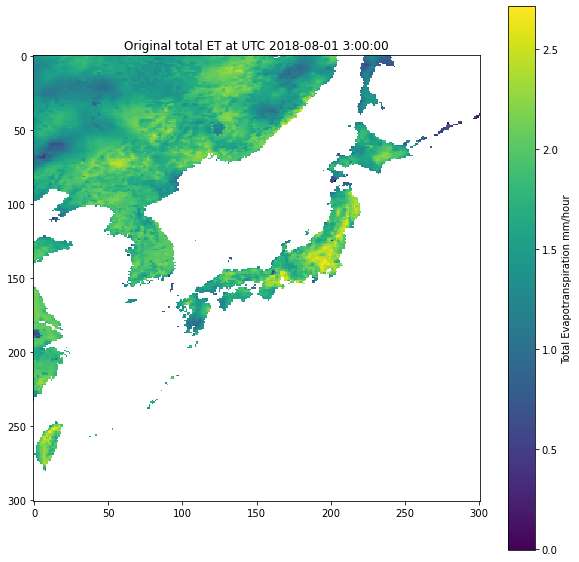

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(et_ds.to_array()[0,1,3, :,:]*1000*-1, interpolation='None') # tp [mm]=tp [m]⋅1000
plt.colorbar(label='Total Evapotranspiration mm/hour')
plt.title('Original total ET at UTC 2018-08-01 3:00:00')

In [7]:
# JP extent
resolution = 0.01 # degree
lats = numpy.arange(50.-resolution/2, 20, -resolution)
lons = numpy.arange(120.+resolution/2, 150, resolution)

In [8]:
day_num = 1 # 1 -> 31(?)
hour_idx = 3 # 0 -> 23

et_dh = et_ds.isel(time=day_num, step=hour_idx)
jp_ds = et_dh.interp(longitude=lons, latitude=lats, method="nearest", kwargs={"fill_value": "extrapolate"}) # linear
et_v = jp_ds.to_array()[0]*1000*-1 # tp [mm]=tp [m]⋅1000

/home/beichen/anaconda3/envs/python36/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/beichen/anaconda3/envs/python36/lib/python3.6/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(0.5, 1.0, '0.01° total ET in study extent at UTC 2018-08-01 03:00:00')

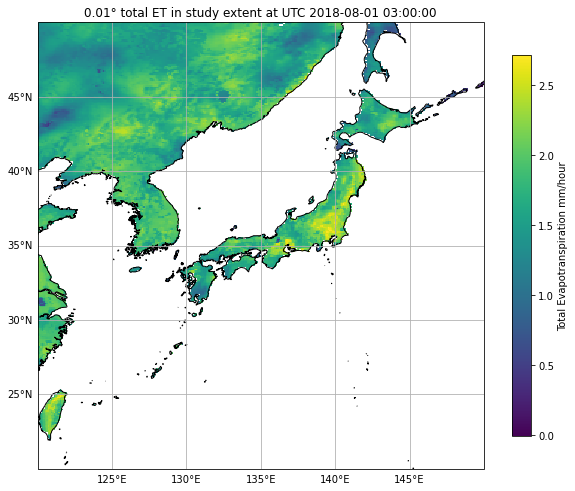

In [9]:
import cartopy.crs as ccrs
import matplotlib.ticker as tck

plt.figure(figsize=(10,10))
jp_extent = (120.0, 150.0, 20, 50)
proj=ccrs.PlateCarree()
ax=plt.axes(projection=proj)
ax.set_extent(jp_extent,proj)
ax.coastlines(resolution='10m')
gl=ax.gridlines(crs=proj,draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = tck.FixedLocator(numpy.arange(120,150,5))
gl.ylocator = tck.FixedLocator(numpy.arange(20,50,5))
plt.imshow(et_v, extent=jp_extent, interpolation='None')
label_with_subscript = 'Total Evapotranspiration mm/hour'
plt.colorbar(label=label_with_subscript, shrink=0.7)
plt.title('0.01° total ET in study extent at UTC 2018-08-01 03:00:00')